# Task 1 - Data Preperation

In [300]:
import pandas as pd

data = pd.read_csv(filepath_or_buffer='penguins_lter.csv')
data.head(5)

data.shape

(344, 17)

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [302]:
data.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

## It can be observed that the following columns contain null values
1. Culmen Length (mm)
2. Culmen Depth (mm)
3. Flipper Length (mm)
4. Body Mass (g)
5. Sex
6. Delta 15 N (o/oo)
7. Delta 13 C (o/oo)
8. Comments

In [303]:
# Contains too many null values, hence basically useless to just drop
data = data.drop('Comments', axis=1)

In [304]:
data.loc[:, data.isnull().any()]

# data[data['Body Mass (g)'] == null]

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [305]:
# it is determined that the 2 null rows is the same for culmen length/depth
# etc therefore the whole row is basically useless hence dropped
data.drop(data[data['Body Mass (g)'].isnull()].index,axis=0, inplace=True)

Statistical reasoning removing null values as it is the most simple strategy and the total no of null rows is in comparison pretty low, therefore removing null values doesnt greatly alter/affect the dataset

In [307]:
data.isna().sum()

studyName               0
Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                     8
Delta 15 N (o/oo)      12
Delta 13 C (o/oo)      11
dtype: int64

In [309]:
data['Sex'].unique()

# an outlier/error due to the presence of '.'

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [310]:
data['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [313]:
# the null values and . value is then replaced with the mode values

# purpose of imputing with mode values due to sex feature being a categorical
# feature, mode imputation appropriate due to the fact the there is no clear 
# pattern to missing data

mode_sex = data['Sex'].mode()[0]  
data['Sex'].fillna(mode_sex,inplace=True)
data['Sex'] = data['Sex'].str.replace(".",mode_sex)

/tmp/ipykernel_795332/3058275547.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Sex'] = data['Sex'].str.replace(".",mode_sex)


In [314]:
data.loc[336]

studyName                                        PAL0910
Sample Number                                        117
Species                Gentoo penguin (Pygoscelis papua)
Region                                            Anvers
Island                                            Biscoe
Stage                                 Adult, 1 Egg Stage
Individual ID                                      N36A1
Clutch Completion                                    Yes
Date Egg                                         12/1/09
Culmen Length (mm)                                  44.5
Culmen Depth (mm)                                   15.7
Flipper Length (mm)                                217.0
Body Mass (g)                                     4875.0
Sex                                                 MALE
Delta 15 N (o/oo)                                8.04111
Delta 13 C (o/oo)                              -26.18444
Name: 336, dtype: object

In [315]:
data['Sex'].value_counts()

MALE      177
FEMALE    165
Name: Sex, dtype: int64

In [316]:
# Encode value female = 1, and male = 0
data.Sex.replace(to_replace=dict(FEMALE=1, MALE=0), inplace=True)

In [317]:
data['Sex'].value_counts()

0    177
1    165
Name: Sex, dtype: int64

In [318]:
# Sex feature is now completely settles
data.isna().sum()

studyName               0
Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                     0
Delta 15 N (o/oo)      12
Delta 13 C (o/oo)      11
dtype: int64

In [319]:
data.loc[:, data.isnull().any()]

,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,NaN,NaN
1,8.94956,-24.69454
2,8.36821,-25.33302
4,8.76651,-25.32426
5,8.66496,-25.29805
...,...,...
338,7.99184,-26.20538
340,8.41151,-26.13832
341,8.30166,-26.04117
342,8.24246,-26.11969


In [320]:
# similar to the dropping of null rows as above, the same is determined for 
# delta13 and delta15 as null value occurs at the same rows.
data.drop(data[data['Delta 13 C (o/oo)'].isnull()].index,axis=0, inplace=True)

In [321]:
data.isna().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      1
Delta 13 C (o/oo)      0
dtype: int64

In [322]:
# impute feature delta 15 null values with mean value as it is numerical 
# therefore the most easiest value to replace is with mean value

# reasoning for imputing with mean value is due to the fact that

col_to_be_imputed = ['Delta 15 N (o/oo)']
for item in col_to_be_imputed:
    data[item].fillna(data[item].mean(),inplace=True)

In [323]:
# At the this point every single feature null values are filled
data.isna().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

# Task 2

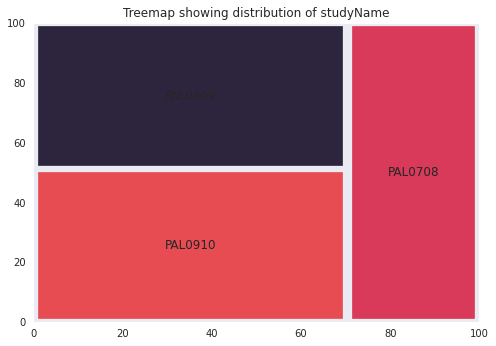

In [324]:
# Univariate analysis on StudyName
studyName_distribution = data["studyName"].value_counts()

import squarify
from matplotlib import pyplot as plt

ax = squarify.plot(sizes=studyName_distribution, label=studyName_distribution.index,alpha=0.9, pad=True)
plt.title("Treemap showing distribution of studyName");

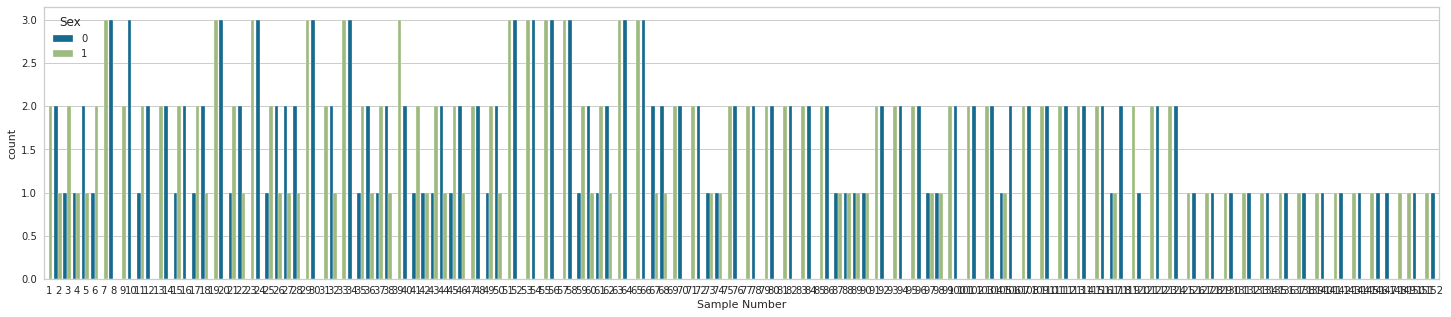

In [203]:
# Univariate analysis on Sample Number
import seaborn as sns
plt.figure(figsize = (25, 5))
sns.countplot(x = data["Sample Number"], hue = data["Sex"], 
              data = data);

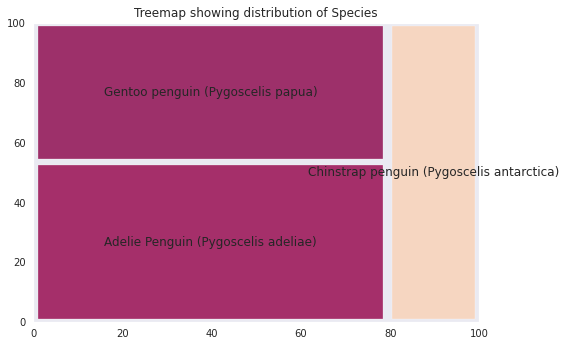

In [325]:
# Univariate analysis on species

species_distribution = data["Species"].value_counts()

import squarify
from matplotlib import pyplot as plt

ax = squarify.plot(sizes=species_distribution, label=species_distribution.index,alpha=0.9, pad=True)
plt.title("Treemap showing distribution of Species");

In [326]:
# THe name is too long, simplify is to make it readable
species_replacement = {'Adelie Penguin (Pygoscelis adeliae)':"Adelie",
                       'Chinstrap penguin (Pygoscelis antarctica)':"Chinstrap",
                       'Gentoo penguin (Pygoscelis papua)':"Gentoo",
                         }


data["Species"] = data["Species"].replace(species_replacement)

data["Species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

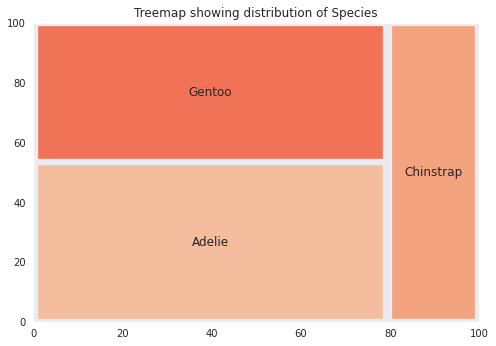

In [327]:
species_distribution = data["Species"].value_counts()

ax = squarify.plot(sizes=species_distribution, label=species_distribution.index,alpha=0.9, pad=True)
plt.title("Treemap showing distribution of Species");

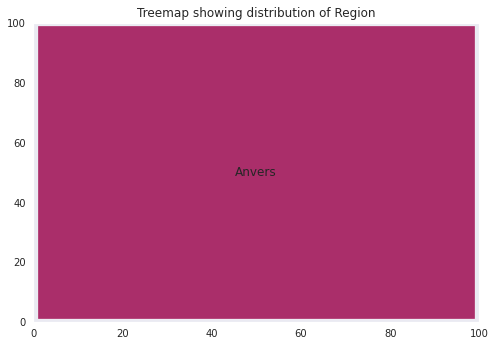

In [328]:
# EDA on Region
Region_distribution = data["Region"].value_counts()

ax = squarify.plot(sizes=Region_distribution, label=Region_distribution.index,alpha=0.9, pad=True)
plt.title("Treemap showing distribution of Region");

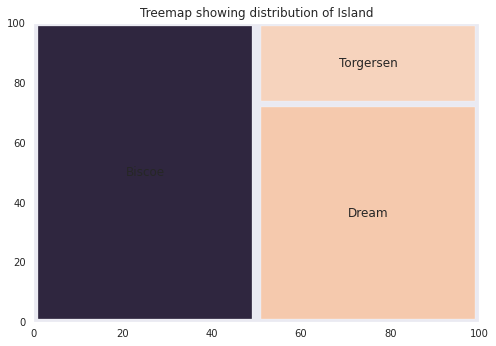

In [329]:
# EDA on Island
Island_distribution = data["Island"].value_counts()

ax = squarify.plot(sizes=Island_distribution, label=Island_distribution.index,alpha=0.9, pad=True)
plt.title("Treemap showing distribution of Island");

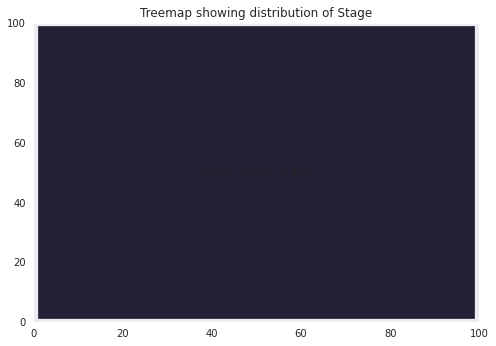

In [330]:
Stage_distribution = data["Stage"].value_counts()

ax = squarify.plot(sizes=Stage_distribution, label=Stage_distribution.index,alpha=0.9, pad=True)
plt.title("Treemap showing distribution of Stage");

array(['N1A2', 'N2A1', 'N3A1', 'N3A2', 'N4A1', 'N4A2', 'N5A2', 'N6A1',
       'N8A1', 'N9A1', 'N9A2', 'N10A1', 'N10A2', 'N11A1', 'N11A2',
       'N12A1', 'N12A2', 'N13A1', 'N13A2', 'N17A1', 'N17A2', 'N18A1',
       'N18A2', 'N21A1', 'N21A2', 'N22A1', 'N22A2', 'N23A1', 'N23A2',
       'N24A1', 'N24A2', 'N25A1', 'N26A1', 'N27A1', 'N27A2', 'N28A1',
       'N28A2', 'N30A1', 'N30A2', 'N25A2', 'N29A1', 'N29A2', 'N32A1',
       'N32A2', 'N34A1', 'N34A2', 'N35A1', 'N35A2', 'N36A1', 'N36A2',
       'N37A1', 'N37A2', 'N38A1', 'N38A2', 'N39A1', 'N39A2', 'N40A1',
       'N40A2', 'N41A1', 'N41A2', 'N42A1', 'N42A2', 'N44A1', 'N44A2',
       'N45A1', 'N45A2', 'N46A1', 'N46A2', 'N48A1', 'N48A2', 'N49A1',
       'N49A2', 'N50A1', 'N50A2', 'N47A1', 'N47A2', 'N51A1', 'N51A2',
       'N53A1', 'N53A2', 'N55A1', 'N55A2', 'N58A1', 'N58A2', 'N60A1',
       'N60A2', 'N61A1', 'N61A2', 'N63A1', 'N63A2', 'N64A1', 'N64A2',
       'N66A1', 'N66A2', 'N67A1', 'N67A2', 'N69A1', 'N69A2', 'N71A1',
       'N71A2', 'N72A1

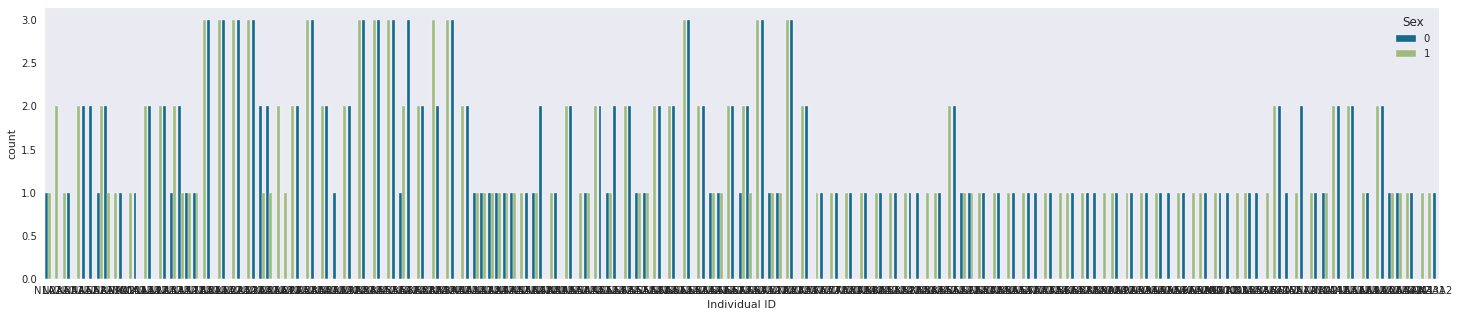

In [331]:
import seaborn as sns
plt.figure(figsize = (25, 5))
sns.countplot(x = data["Individual ID"], hue = data["Sex"], 
              data = data);

data['Individual ID'].unique()

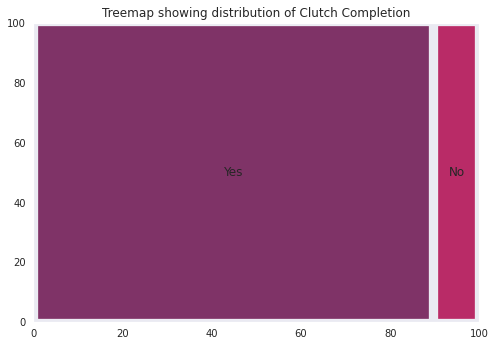

In [333]:
clutch_distribution = data["Clutch Completion"].value_counts()

ax = squarify.plot(sizes=clutch_distribution, label=clutch_distribution.index,alpha=0.9, pad=True)
plt.title("Treemap showing distribution of Clutch Completion");

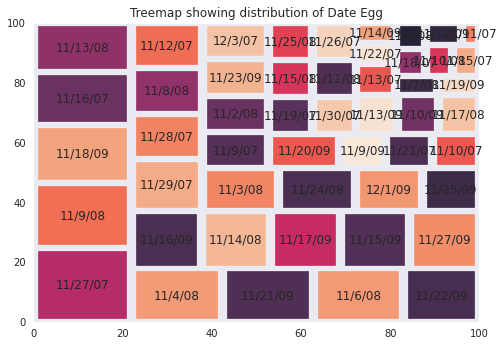

In [334]:
egg_distribution = data["Date Egg"].value_counts()

ax = squarify.plot(sizes=egg_distribution, label=egg_distribution.index,alpha=0.9, pad=True)
plt.title("Treemap showing distribution of Date Egg");

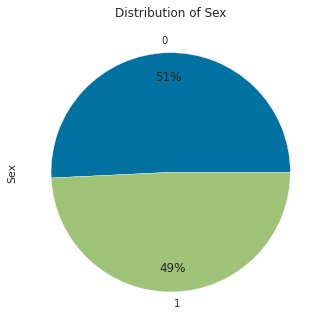

In [335]:
sex_distribution = data["Sex"].value_counts()

sex_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, 
                          radius=1, title="Distribution of Sex");

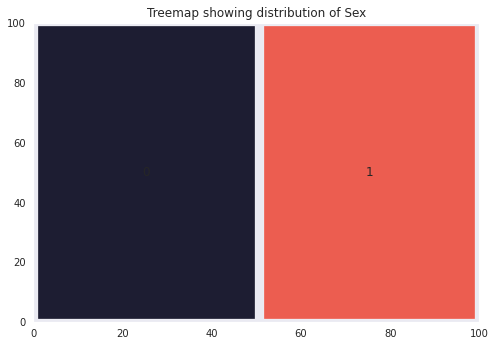

In [336]:
sex_distribution = data["Sex"].value_counts()

ax = squarify.plot(sizes=sex_distribution, label=sex_distribution.index,alpha=0.9, pad=True)
plt.title("Treemap showing distribution of Sex");

https://www.kaggle.com/code/mohamedharris/how-to-classify-penguins-a-beginner-s-guide

# Univariate analysis of categorical values

In [337]:
import numpy as np
def ecdf(x):
    n = len(x)
    a = np.sort(x)
    b = np.arange(1, 1 + n) / n
    plt.subplot(211)
    plt.plot(a, b, marker = '.', linestyle = 'None', c = 'seagreen')
    mean_x = np.mean(x)
    plt.axvline(mean_x, c = 'k', label = 'Mean')
    plt.title('ECDF')
    plt.legend()
    plt.show()
    plt.subplot(212)
    sns.distplot(x, color = 'r')
    plt.title('Probability Density Function')
    plt.show()

ECDF Shows:
1. The black line indicating the mean value for the the particular feature
2. The y-axis indicates the percentage of the value eg at value 40 has 0.2 which indicates around 20% change of the culmen length are less 40mm if chosen at random

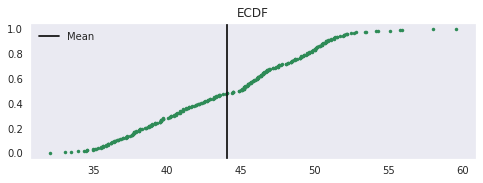

/home/s4607758/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


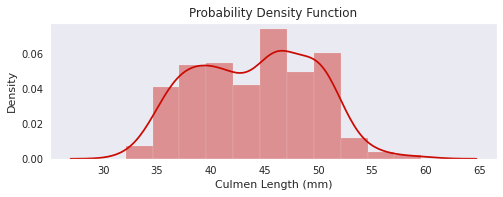

In [338]:
ecdf(data['Culmen Length (mm)'])

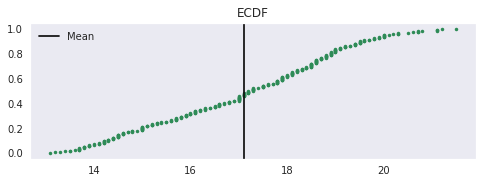

/home/s4607758/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


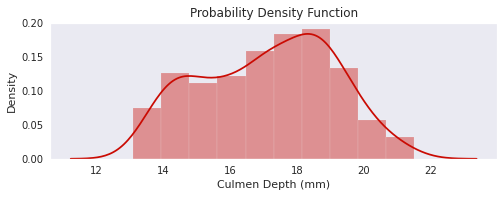

In [339]:
ecdf(data['Culmen Depth (mm)'])

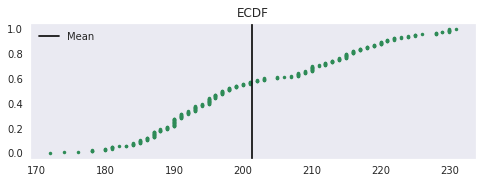

/home/s4607758/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


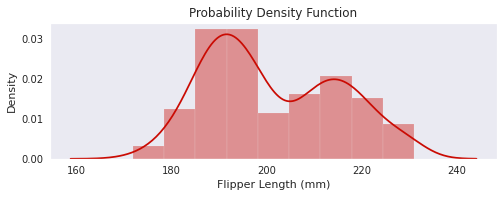

In [340]:
ecdf(data['Flipper Length (mm)'])

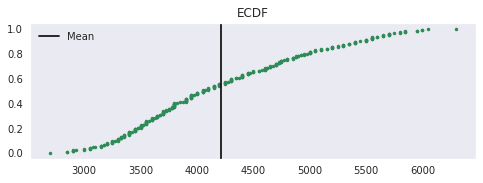

/home/s4607758/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


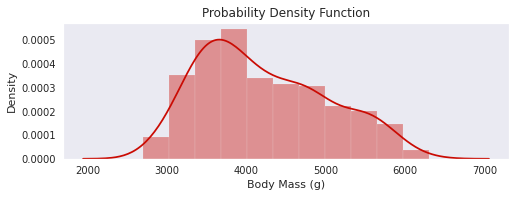

In [341]:
ecdf(data['Body Mass (g)'])

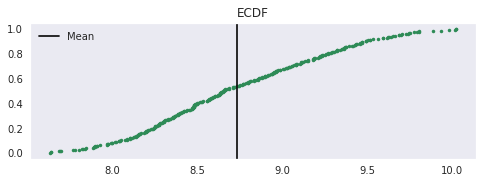

/home/s4607758/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


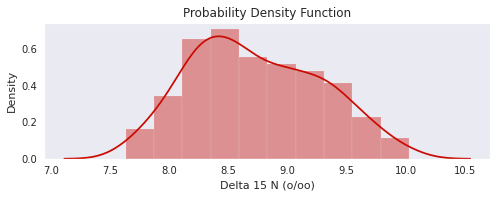

In [342]:
ecdf(data['Delta 15 N (o/oo)'])   

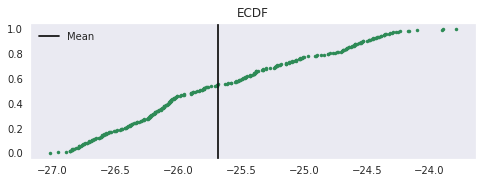

/home/s4607758/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


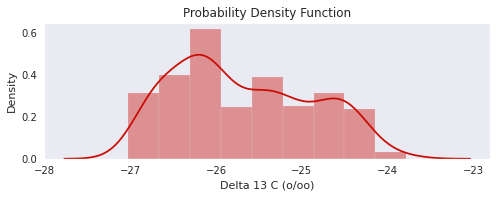

In [343]:
ecdf(data['Delta 13 C (o/oo)'])

Conclusion from observing all the numerical features, None are deemed to be normal distribution

In [345]:
# Housekeeping task to make each column to be easier to call
data = data.rename(columns={'Date Egg': 'MonthEgg', "Clutch Completion": "ClutchCompletion", 
                            "Culmen Length (mm)": "CulmenLength", "Culmen Depth (mm)": "CulmenDepth", 
                            "Flipper Length (mm)": "FlipperLength", "Body Mass (g)": "BodyMass", 
                            "Delta 15 N (o/oo)": "Delta15N", "Delta 13 C (o/oo)": "Delta13C"})

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 1 to 343
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   studyName         331 non-null    object 
 1   Sample Number     331 non-null    int64  
 2   Species           331 non-null    object 
 3   Region            331 non-null    object 
 4   Island            331 non-null    object 
 5   Stage             331 non-null    object 
 6   Individual ID     331 non-null    object 
 7   ClutchCompletion  331 non-null    object 
 8   MonthEgg          331 non-null    object 
 9   CulmenLength      331 non-null    float64
 10  CulmenDepth       331 non-null    float64
 11  FlipperLength     331 non-null    float64
 12  BodyMass          331 non-null    float64
 13  Sex               331 non-null    int64  
 14  Delta15N          331 non-null    float64
 15  Delta13C          331 non-null    float64
dtypes: float64(6), int64(2), object(8)
memory us

# Bivariate EDA

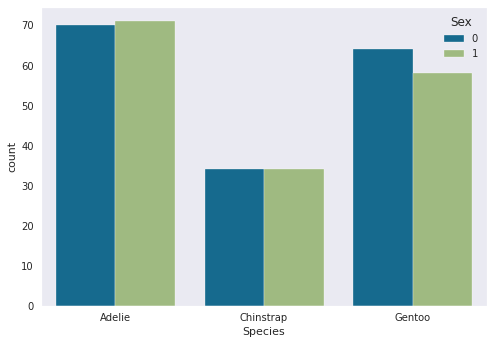

In [347]:
# Histogram it is determined that there is no significant variability of the sex features
# Each of the species basically has the same amount therefore no clear relationship
sns.countplot(x="Species", hue="Sex", data=data)
plt.show()

Culmen Length Distribution difference in species


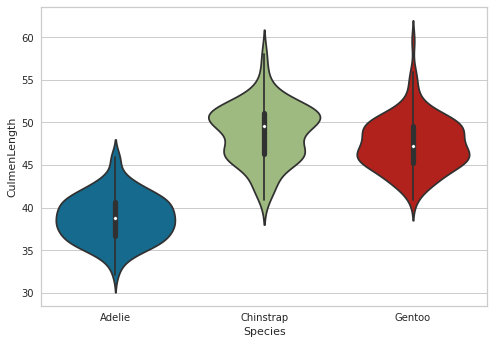

In [225]:
# Violin plot is used to visualize the distribution of numerical data.
# violin plots depict summary statistics and the density of each variable.
print('Culmen Length Distribution difference in species')
sns.violinplot(data=data, x="Species", y="CulmenLength", size=8)
plt.show()

# From the violinplot it can be determined that adelie is generally
# very different from the other 2 species as the other two often overlap at
# 53 to 45 cm of the culmen length

Culmen Depth Distribution difference in species


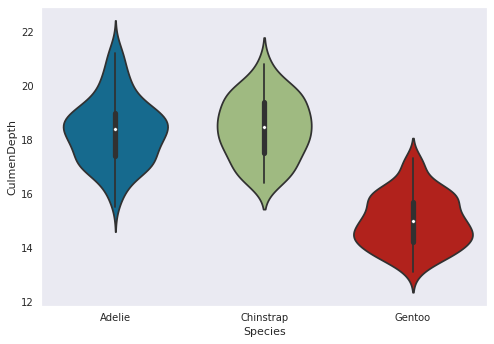

In [348]:
print('Culmen Depth Distribution difference in species')
sns.violinplot(data=data, x="Species", y="CulmenDepth")
plt.show()

# From the violinplot it can be determined that all 3 species is pretty close together
# with a many overlaps in adelie and chinstrap with Gentoo being the most further apart

Culmen Depth Distribution difference in species


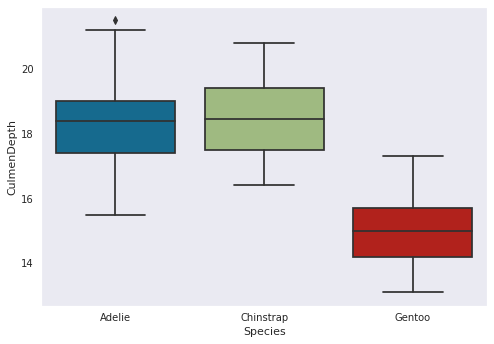

In [349]:
print('Culmen Depth Distribution difference in species')
sns.boxplot(data=data, x="Species", y="CulmenDepth")
plt.show()

# the distribution of Gentoo is very different from the other 2 species

<AxesSubplot:xlabel='Species', ylabel='BodyMass'>

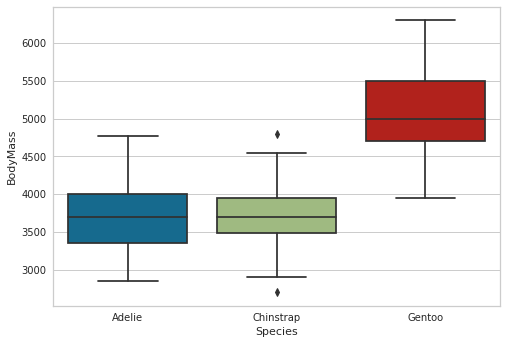

In [227]:
sns.boxplot(x=data["Species"],y=data["BodyMass"])
# the distribution of Gentoo is very different from the other 2 species

<AxesSubplot:xlabel='Species', ylabel='CulmenLength'>

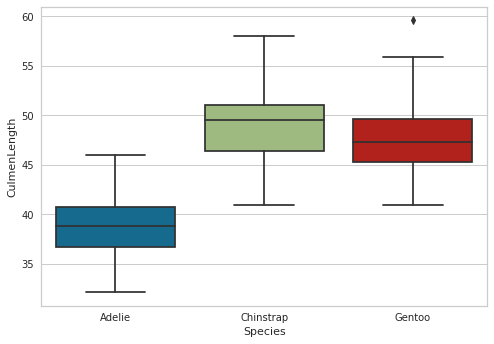

In [228]:
sns.boxplot(x=data["Species"],y=data["CulmenLength"])
# the distribution of Adelie is very different from the other 2 species

<AxesSubplot:xlabel='Species', ylabel='FlipperLength'>

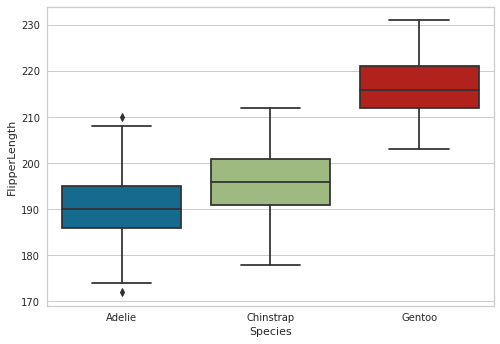

In [229]:
sns.boxplot(x=data["Species"],y=data["FlipperLength"])
# the distribution of Gentoo is very different from the other 2 species

<AxesSubplot:xlabel='Species', ylabel='Delta15N'>

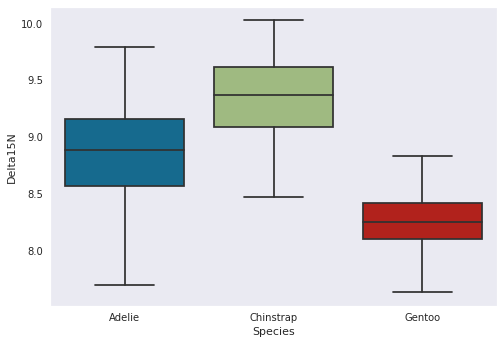

In [350]:
sns.boxplot(x=data["Species"],y=data["Delta15N"])
# the distribution of each species is different with some overlaps on Adelie 
# and chinstrap around 9cms

<AxesSubplot:xlabel='Species', ylabel='Delta13C'>

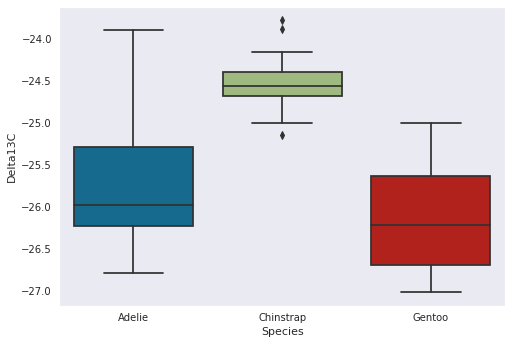

In [351]:
sns.boxplot(x=data["Species"],y=data["Delta13C"])
# the distribution of Chinstrap is very different from the other 2 species

<AxesSubplot:xlabel='Island', ylabel='CulmenLength'>

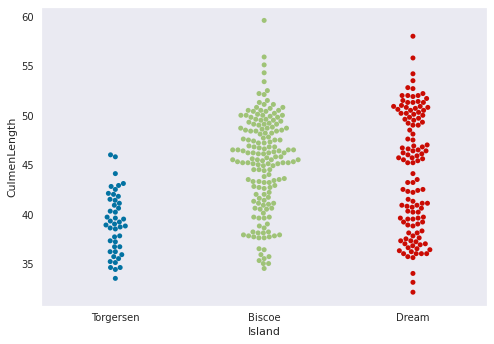

In [353]:
sns.swarmplot(x=data.Island,y=data.CulmenLength)

<AxesSubplot:xlabel='Island', ylabel='BodyMass'>

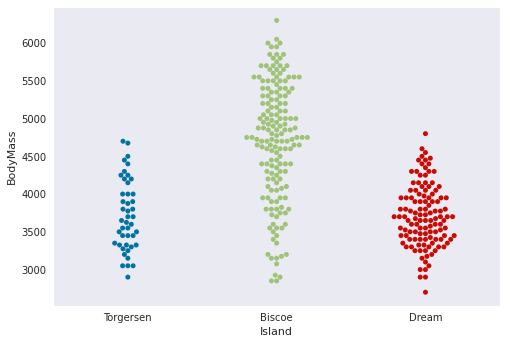

In [354]:
sns.swarmplot(x=data.Island,y=data.BodyMass)

<AxesSubplot:xlabel='Species', ylabel='BodyMass'>

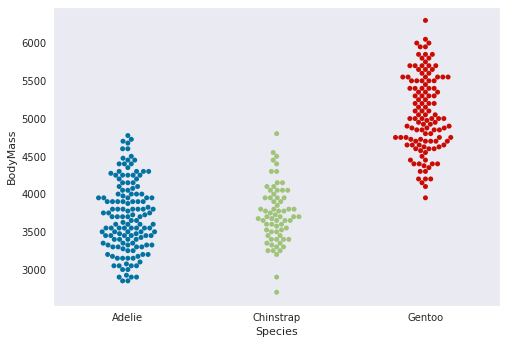

In [355]:
sns.swarmplot(x=data.Species,y=data.BodyMass)

Mulvariate Analysis

<AxesSubplot:xlabel='CulmenLength', ylabel='CulmenDepth'>

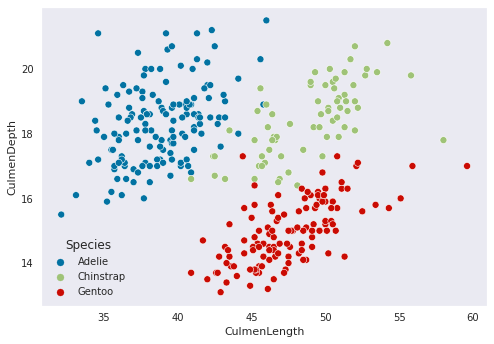

In [235]:
sns.set_style('dark')
sns.scatterplot(x=data.CulmenLength,y=data.CulmenDepth,hue=data.Species)

# Task 3 - Mean and Std Div of each measure diffenciating from each species

### Mean and Std Div of Body Mass

Mean can be used to get an overall idea or picture of the data set

standard deviation is used to measure the spread of values in a sample.

In [122]:
# It can be observed that on average Gentoo is heaviest of all the species
print("Mean body mass index distribution")
data.groupby(['Species']).mean()['BodyMass'].round(1)

Mean body mass index distribution


Species
Adelie       3703.7
Chinstrap    3733.1
Gentoo       5074.6
Name: BodyMass, dtype: float64

In [121]:
# The weight discrepency is the heighest in Gentoo species
print("Std Div body mass index distribution")
data.groupby(['Species']).std()['BodyMass'].round(3)

Std Div body mass index distribution


Species
Adelie       460.463
Chinstrap    384.335
Gentoo       505.946
Name: BodyMass, dtype: float64

### Mean and Std Div of CulmenLength

In [356]:
# It can be observed that on average Gentoo posses the largest culmen length with 
# a very similar mean for chinstrap and gentoo therefore could lead to overlap
print("CulmenLength mass index distribution")
data.groupby(['Species']).mean()['CulmenLength'].round(1)

CulmenLength mass index distribution


Species
Adelie       38.8
Chinstrap    48.8
Gentoo       47.5
Name: CulmenLength, dtype: float64

In [124]:
# pretty close std div for each species which leads to perhaps no significant outlier
print("Std Div CulmenLength index distribution")
data.groupby(['Species']).std()['CulmenLength'].round(2)

Std Div CulmenLength index distribution


Species
Adelie       2.70
Chinstrap    3.34
Gentoo       3.09
Name: CulmenLength, dtype: float64

### Mean and Std Div of CulmenDepth

In [357]:
# It can be observed that on average Chinstrap posses the largest CulmenDepth  
# with a very similar mean for chinstrap and adelie therefore could lead to overlap
# with gentoo having the most significant difference from both species
print("CulmenDepth mass index distribution")
data.groupby(['Species']).mean()['CulmenDepth'].round(1)

CulmenDepth mass index distribution


Species
Adelie       18.3
Chinstrap    18.4
Gentoo       15.0
Name: CulmenDepth, dtype: float64

In [375]:
# Can be observed Gentoo contains the least variance of values to the mean
print("Std Div CulmenDepth index distribution")
data.groupby(['Species']).std()['CulmenDepth'].round(2)

Std Div CulmenDepth index distribution


Species
Adelie       1.23
Chinstrap    1.14
Gentoo       0.98
Name: CulmenDepth, dtype: float64

### Mean and Std Div of FlipperLength

In [127]:
# observe that Gentoo would be the most different from the other 
# 2 species with a noticeable higher mean value
print("CulmenLength mass index distribution")
data.groupby(['Species']).mean()['FlipperLength'].round(1)

CulmenLength mass index distribution


Species
Adelie       190.3
Chinstrap    195.8
Gentoo       217.1
Name: FlipperLength, dtype: float64

In [376]:
# From the mean it is observed that mean value of Adelie and gentoo is very far apart
# And with both containing low std div which can be assumed that the two species
# would be very far apart with not many overlaps
print("Std Div CulmenLength index distribution")
data.groupby(['Species']).std()['FlipperLength'].round(2)

Std Div CulmenLength index distribution


Species
Adelie       6.48
Chinstrap    7.13
Gentoo       6.50
Name: FlipperLength, dtype: float64

### Mean and Std Div of Delta15N

In [129]:
print("CulmenLength mass index distribution")
data.groupby(['Species']).mean()['Delta15N'].round(1)

CulmenLength mass index distribution


Species
Adelie       8.9
Chinstrap    9.3
Gentoo       8.2
Name: Delta15N, dtype: float64

In [130]:
print("Std Div CulmenLength index distribution")
data.groupby(['Species']).std()['Delta15N'].round(2)

Std Div CulmenLength index distribution


Species
Adelie       0.43
Chinstrap    0.37
Gentoo       0.26
Name: Delta15N, dtype: float64

### Mean and Std Div of Delta13C

In [131]:
print("CulmenLength mass index distribution")
data.groupby(['Species']).mean()['Delta13C'].round(1)

CulmenLength mass index distribution


Species
Adelie      -25.8
Chinstrap   -24.5
Gentoo      -26.2
Name: Delta13C, dtype: float64

In [132]:
print("Std Div CulmenLength index distribution")
data.groupby(['Species']).std()['Delta13C'].round(2)

Std Div CulmenLength index distribution


Species
Adelie       0.59
Chinstrap    0.24
Gentoo       0.54
Name: Delta13C, dtype: float64

# Task 4 - Correlation of Numerical Features

In [361]:
corr_data = data.drop(['Sex','Sample Number'],axis=1)

In [364]:
corr_data.cov()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Delta15N,Delta13C
CulmenLength,29.764853,-2.370843,49.332825,2588.240273,-0.179057,0.818786
CulmenDepth,-2.370843,3.920445,-15.970516,-744.827657,0.659459,0.675877
FlipperLength,49.332825,-15.970516,194.426549,9800.838597,-3.900180,-4.165074
BodyMass,2588.240273,-744.827657,9800.838597,646513.938478,-238.236665,-239.166514
Delta15N,-0.179057,0.659459,-3.900180,-238.236665,0.303528,0.247420
Delta13C,0.818786,0.675877,-4.165074,-239.166514,0.247420,0.630374


<AxesSubplot:>

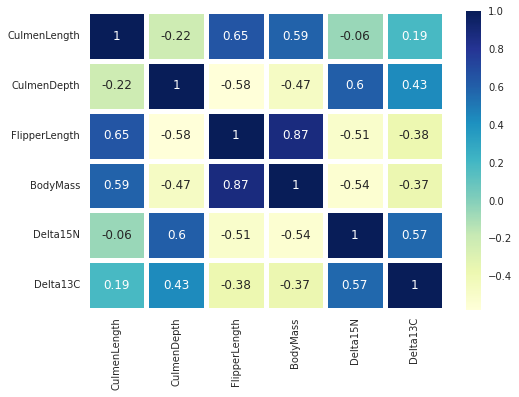

In [366]:
correlation_matrix = corr_data.corr()
sns.set_style('dark')
sns.heatmap(correlation_matrix,annot=True,linecolor='white',linewidths=5,cmap="YlGnBu")

According to the correlation matrix highest correlation between features are as follow:
1. FlipperLength & BodyMass
2. FlipperLength & Culmen Length
3. Culmen Depth & Delta15N
4. Delta15N & Delta13C

The scatter plot which shows us the correlation with respect to other features.This method helps just to figure out the important features which account the most for the classification in our model.

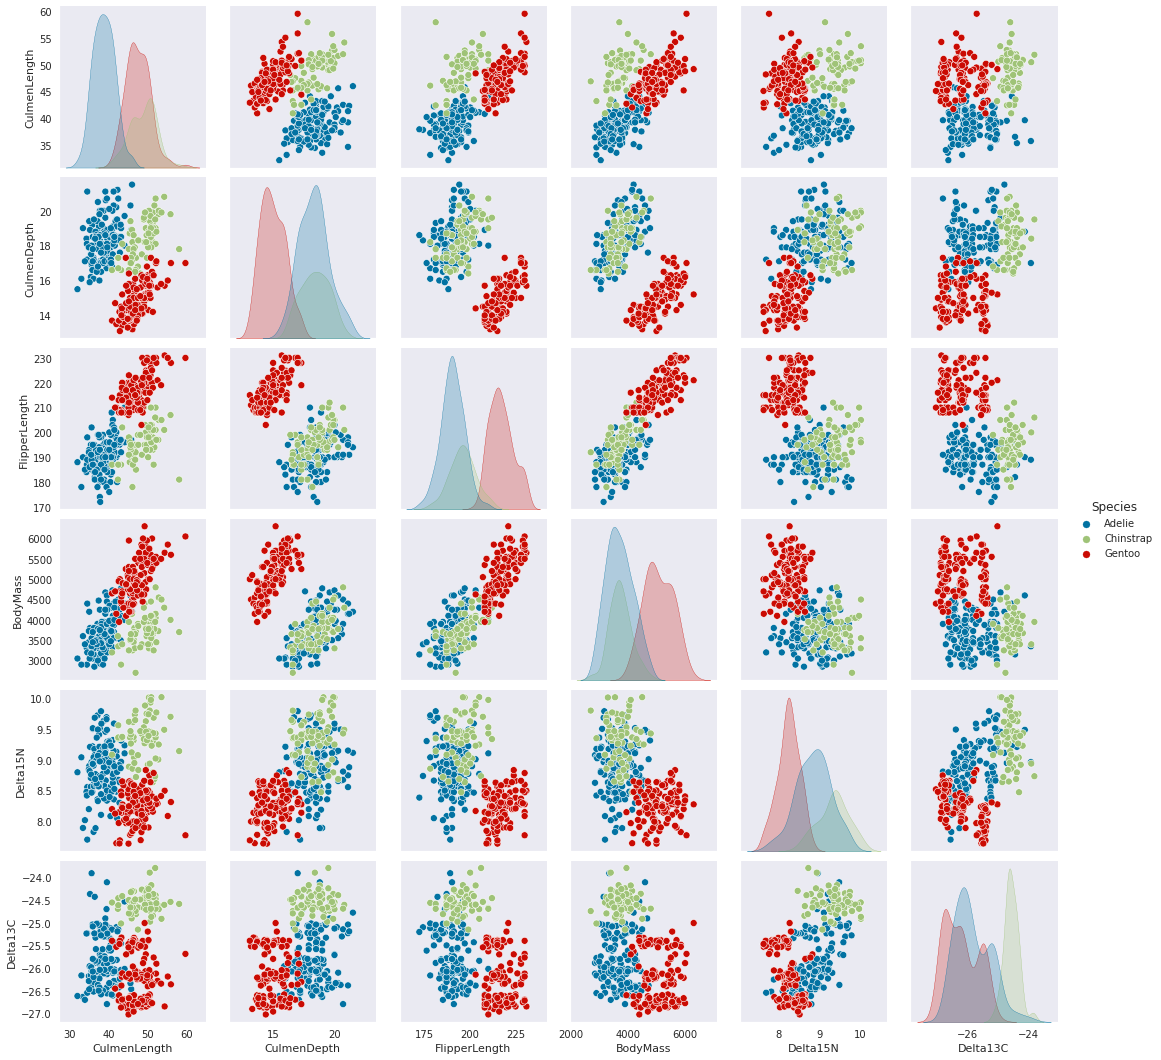

In [367]:
sns.pairplot(corr_data,hue='Species')
plt.show()

The following are clear observable cluster:
1. CulmenLength & FlipperLength
2. BodyMass & CulmenLength

culmen_length vs culmen_depth


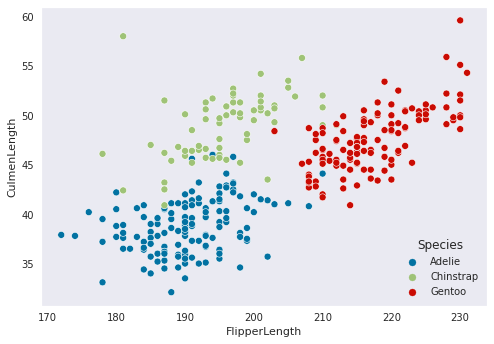

In [368]:
print('culmen_length vs culmen_depth')
sns.scatterplot(data=data, x='FlipperLength', y='CulmenLength', hue='Species')
plt.show()

culmen_length vs culmen_depth


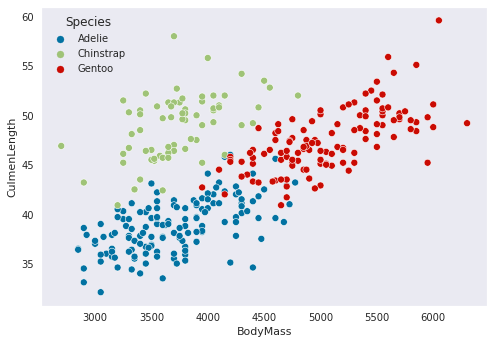

In [369]:
print('culmen_length vs culmen_depth')
sns.scatterplot(data=data, x='BodyMass', y='CulmenLength', hue='Species')
plt.show()

# Label Encoding

allow the conversion of categorical values to be changed to ordinal per column which can be then used for feature selection by correlation matrix

Eventually not really used

In [144]:
from sklearn import preprocessing 
LE=preprocessing.LabelEncoder()

In [146]:
lter_encode=data.copy()
lter_encode['Island']=LE.fit_transform(lter_encode['Island'])
lter_encode['ClutchCompletion']=LE.fit_transform(lter_encode['ClutchCompletion'])
lter_encode['Sex']=LE.fit_transform(lter_encode['Sex'])
lter_encode['Species_Code']=LE.fit_transform(lter_encode['Species']) #This will be used for a correlation matrix
lter_encode.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,ClutchCompletion,MonthEgg,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Sex,Delta15N,Delta13C,Species_Code
1,PAL0708,2,Adelie,Anvers,2,"Adult, 1 Egg Stage",N1A2,1,11/11/07,39.5,17.4,186.0,3800.0,1,8.94956,-24.69454,0
2,PAL0708,3,Adelie,Anvers,2,"Adult, 1 Egg Stage",N2A1,1,11/16/07,40.3,18.0,195.0,3250.0,1,8.36821,-25.33302,0
4,PAL0708,5,Adelie,Anvers,2,"Adult, 1 Egg Stage",N3A1,1,11/16/07,36.7,19.3,193.0,3450.0,1,8.76651,-25.32426,0
5,PAL0708,6,Adelie,Anvers,2,"Adult, 1 Egg Stage",N3A2,1,11/16/07,39.3,20.6,190.0,3650.0,0,8.66496,-25.29805,0
6,PAL0708,7,Adelie,Anvers,2,"Adult, 1 Egg Stage",N4A1,0,11/15/07,38.9,17.8,181.0,3625.0,1,9.18718,-25.21799,0


# Drop the categorical features

In [148]:
model_lter=lter_encode.drop(['studyName','Sample Number','Region',
                             'MonthEgg', 'Individual ID','Stage']
                             , axis=1)

## Feature Selection
Before building models, it is good practice to remove features that may be unneccessary. We can do this using the SelectKBest function in the sklearn package. This will give us a score of importance by ANOVA F-ratios. The higher the ratio the more important the feature will be.

In [149]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [151]:
X=model_lter.drop(['Species', 'Species_Code'], axis=1)
Y=model_lter['Species']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

            Feature       Score
4     FlipperLength  567.110488
2      CulmenLength  386.815238
3       CulmenDepth  348.335250
5          BodyMass  331.921345
8          Delta13C  226.562050
7          Delta15N  215.805449
0            Island  143.326164
1  ClutchCompletion    5.501184
6               Sex    0.112398


In [165]:
lter_encode_drop=model_lter.copy()
lter_encode_drop=lter_encode_drop.drop(['Sex','ClutchCompletion','Species_Code'], axis=1)
lter_encode_drop.head()

,Species,Island,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Delta15N,Delta13C
1,Adelie,2,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,Adelie,2,40.3,18.0,195.0,3250.0,8.36821,-25.33302
4,Adelie,2,36.7,19.3,193.0,3450.0,8.76651,-25.32426
5,Adelie,2,39.3,20.6,190.0,3650.0,8.66496,-25.29805
6,Adelie,2,38.9,17.8,181.0,3625.0,9.18718,-25.21799


In [168]:
lter_encode_drop=lter_encode_drop.drop(['Species'], axis=1)

# Task 5: K-Means Clustering


In [255]:
originaldata = pd.read_csv(filepath_or_buffer='penguins_lter.csv')

In [240]:
data = data.drop(["Species", "studyName", "Sample Number", "Individual ID", "Stage", "Region"], axis=1)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 1 to 343
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Island            331 non-null    object 
 1   ClutchCompletion  331 non-null    object 
 2   MonthEgg          331 non-null    object 
 3   CulmenLength      331 non-null    float64
 4   CulmenDepth       331 non-null    float64
 5   FlipperLength     331 non-null    float64
 6   BodyMass          331 non-null    float64
 7   Sex               331 non-null    int64  
 8   Delta15N          331 non-null    float64
 9   Delta13C          331 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 28.4+ KB


In [243]:
data['MonthEgg'] =  pd.to_datetime(data['MonthEgg'], format='%m/%d/%y')
data['MonthEgg'] = pd.DatetimeIndex(data['MonthEgg']).month

In [246]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
encoder = OrdinalEncoder()
data[["Island", "ClutchCompletion"]] = encoder.fit_transform(data[["Island", "ClutchCompletion"]])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 1 to 343
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Island            331 non-null    float64
 1   ClutchCompletion  331 non-null    float64
 2   MonthEgg          331 non-null    int64  
 3   CulmenLength      331 non-null    float64
 4   CulmenDepth       331 non-null    float64
 5   FlipperLength     331 non-null    float64
 6   BodyMass          331 non-null    float64
 7   Sex               331 non-null    int64  
 8   Delta15N          331 non-null    float64
 9   Delta13C          331 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 28.4 KB


In [247]:
scaler = MinMaxScaler()
columns = ["Island", "ClutchCompletion", "MonthEgg", "CulmenLength", 
           "CulmenDepth", "FlipperLength", "BodyMass", "Delta15N", "Delta13C"]
data[columns] = scaler.fit_transform(data[columns])

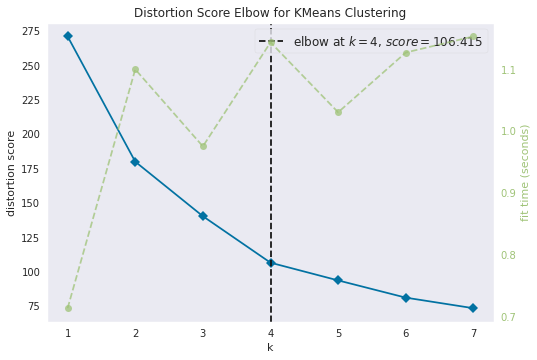

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=7, random_state=20), k=(1, 8))

In [249]:
from sklearn.cluster import KMeans, SpectralClustering, MeanShift, estimate_bandwidth
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Finding the number of cluster (=species)
kelbow_visualizer(KMeans(random_state=20), data, k=(1,8))

kelbow_visualizer determines the optimal clusters would be four, furthur analysis is used to fit my initial assumption of 3 clusters for the 3 species

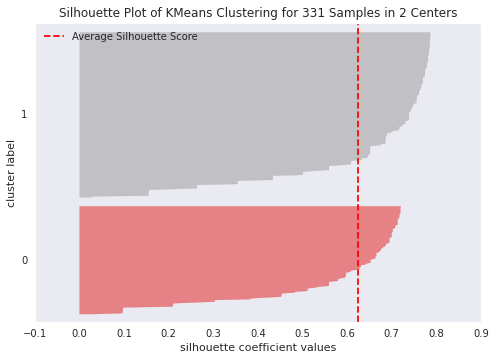

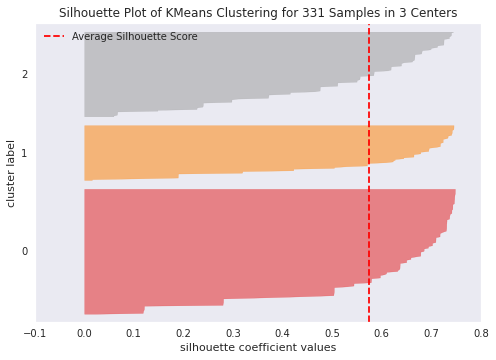

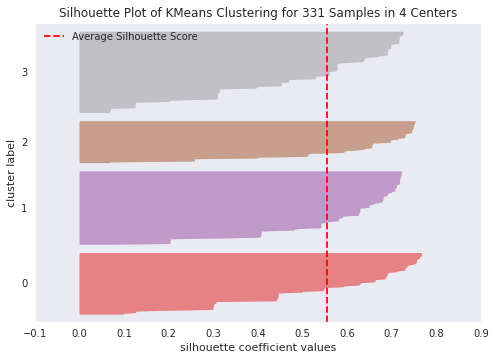

In [250]:
def sillouethe(data, max_clusters):
    cluster=list(range(2, max_clusters))
    for i in cluster:
        model = KMeans(i)
        visualizer = SilhouetteVisualizer(model)
        visualizer.fit(lter_encode_drop)
        
        visualizer.poof()

sillouethe(data, 5)

The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).
According to sillouethe, the optimal clusters is 3

In [251]:
kmean_data = data.copy()

/home/s4607758/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/s4607758/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/s4607758/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

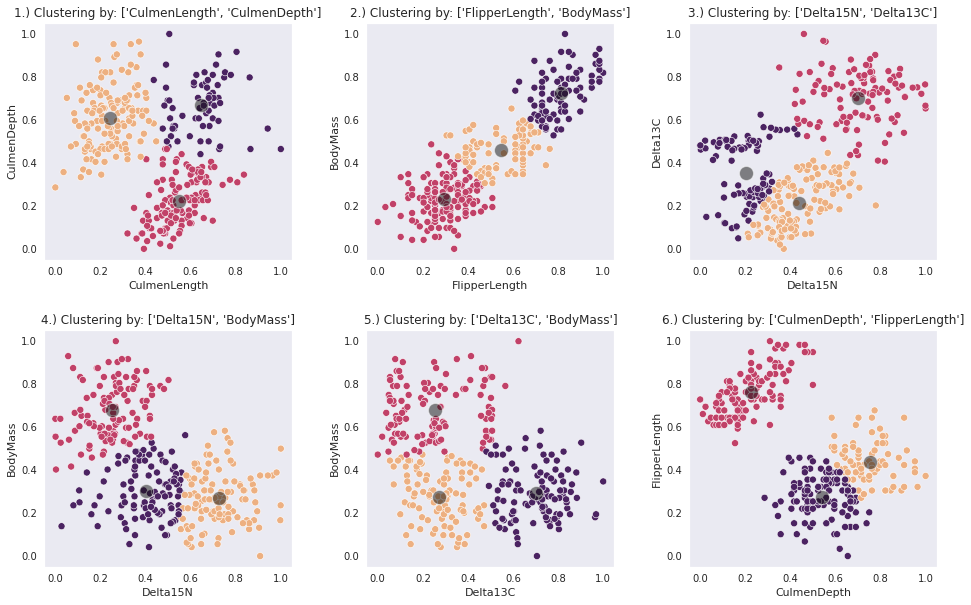

In [252]:
i = 1
kmean_clusters = [["CulmenLength", "CulmenDepth"], ["FlipperLength", "BodyMass"], 
                  ["Delta15N", "Delta13C"], ["Delta15N", "BodyMass"], 
                    ["Delta13C", "BodyMass"], ["CulmenDepth", "FlipperLength"],
                 ]

plt.figure(figsize=(16,10))
for cluster in kmean_clusters:
    X_kmean = kmean_data[cluster]
    kmeans = KMeans(n_clusters=3, random_state=14)
    kmeans.fit(X_kmean)
    y_kmeans = kmeans.predict(X_kmean)
    kmean_data[f"Cluster{i}"] = y_kmeans
    
    plt.subplot(2, 3, i)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.title(f"{i}.) Clustering by: {cluster}")
    sns.scatterplot(X_kmean.loc[:, cluster[0]], X_kmean.loc[:, cluster[1]], c=y_kmeans, s=50, cmap="flare")
    centers = kmeans.cluster_centers_
    sns.scatterplot(centers[:, 0], centers[:, 1], s=200, color="k", alpha=0.5)
    i+=1
plt.show()

## Comparing kmeans clustering with EDA

culmen_length vs culmen_depth


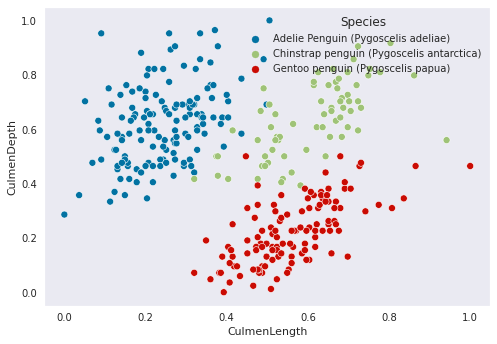

In [257]:
# There are some clustering that fits well such as culmen length and depth
print('culmen_length vs culmen_depth')
sns.scatterplot(data=data, x='CulmenLength', y='CulmenDepth', hue=originaldata.Species)
plt.show()

FlipperLength vs culmen_depth


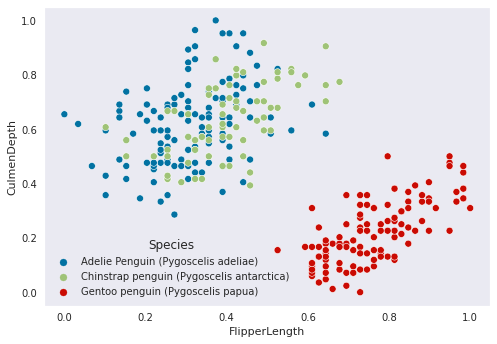

In [259]:
# There are some clustering that fits well such as culmen depth and FlipperLength
print('FlipperLength vs culmen_depth')
sns.scatterplot(data=data, x='FlipperLength', y='CulmenDepth', hue=originaldata.Species)
plt.show()

culmen_length vs culmen_depth


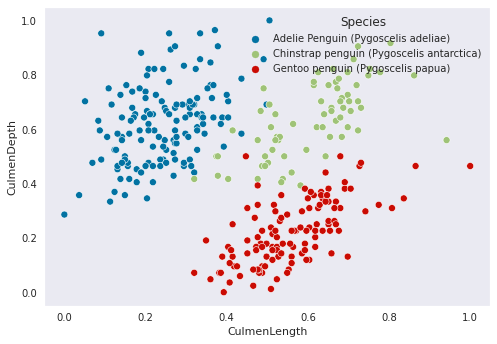

In [260]:
# There are some clustering that fits well such as culmen depth and FlipperLength
print('culmen_length vs culmen_depth')
sns.scatterplot(data=data, x='CulmenLength', y='CulmenDepth', hue=originaldata.Species)
plt.show()

/home/s4607758/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/s4607758/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/s4607758/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':"Clustering by: ['CulmenLength', 'CulmenDepth']"}, xlabel='CulmenLength', ylabel='CulmenDepth'>

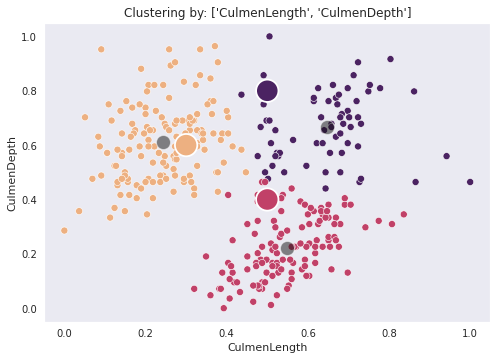

In [258]:
cluster = ["CulmenLength", "CulmenDepth"]
X_kmean = kmean_data[cluster]

new_data_kmean = [[0.3, 0.6], [0.5, 0.4], [0.5, 0.8]]
X_new_kmean = pd.DataFrame(new_data_kmean, columns = cluster).astype(float)

kmeans = KMeans(n_clusters=3, random_state=14)
kmeans.fit(X_kmean)
y_kmeans = kmeans.predict(X_kmean)


plt.title(f"Clustering by: {cluster}")
sns.scatterplot(X_kmean.loc[:, cluster[0]], X_kmean.loc[:, cluster[1]], c=y_kmeans, s=50, cmap="flare")
centers_kmean = kmeans.cluster_centers_
sns.scatterplot(centers_kmean[:, 0], centers_kmean[:, 1], s=200, color="k", alpha=0.5)

# cluster and plot new values in scatterplot -> big dots
y_new_kmean = kmeans.predict(X_new_kmean)
sns.scatterplot(X_new_kmean.loc[:, cluster[0]], X_new_kmean.loc[:, cluster[1]], c=y_new_kmean, s=500, cmap="flare")

The following shows that for these particular features, the clustering algorithms result and ground truth are almost indistinguishable

Conclusion on K-means clustering:

The algorithms often will be able to differentiate Adelie and Gentoo species due to how far the species is classified

# Task 6: PCA

In [274]:
pca_data = data.copy()

In [ ]:
model_lter
df = penguins.dropna()
df = df.drop([‘island’, ‘sex’], axis = 1)

In [286]:
model_lter.head()

,Species,Island,ClutchCompletion,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Sex,Delta15N,Delta13C,Species_Code
1,Adelie,2,1,39.5,17.4,186.0,3800.0,1,8.94956,-24.69454,0
2,Adelie,2,1,40.3,18.0,195.0,3250.0,1,8.36821,-25.33302,0
4,Adelie,2,1,36.7,19.3,193.0,3450.0,1,8.76651,-25.32426,0
5,Adelie,2,1,39.3,20.6,190.0,3650.0,0,8.66496,-25.29805,0
6,Adelie,2,0,38.9,17.8,181.0,3625.0,1,9.18718,-25.21799,0


In [278]:
# Defining the input and target variable

X = pca_data.drop(["Island", "ClutchCompletion", "MonthEgg"], axis=1)

In [292]:
y = model_lter['Species']

In [291]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 1 to 343
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   331 non-null    float64
 1   CulmenDepth    331 non-null    float64
 2   FlipperLength  331 non-null    float64
 3   BodyMass       331 non-null    float64
 4   Sex            331 non-null    int64  
 5   Delta15N       331 non-null    float64
 6   Delta13C       331 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 28.8 KB


In [293]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 331 entries, 1 to 343
Series name: Species
Non-Null Count  Dtype 
--------------  ----- 
331 non-null    object
dtypes: object(1)
memory usage: 13.3+ KB


In [280]:
# Scaling all input variables
from sklearn.preprocessing import StandardScaler

# Instantiate a new scaler
scaler = StandardScaler()
# Learn the pattern from the input data
scaler.fit(X)
#Apply the pattern
X_scaled = scaler.transform(X) 
# Convert into Pandas dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [281]:
# Use n_components=4 to see explained variance for all columns: 
pca = PCA(n_components=4)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:2].sum())

[0.48112821 0.2571417  0.13988327 0.05351264]
0.7382699152501311


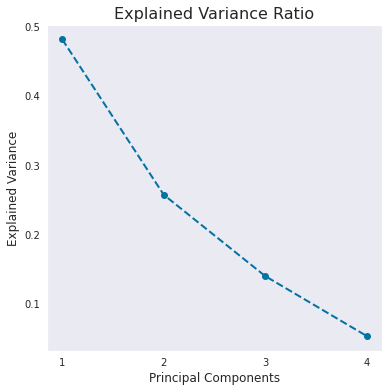

In [282]:
# Visual for each component’s explained variance
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(pca.explained_variance_ratio_,'bo--',linewidth=2)
ax.set_xlabel('Principal Components', fontsize = 12)
ax.set_ylabel('Explained Variance', fontsize = 12)
ax.set_title('Explained Variance Ratio', fontsize = 16)
n = len(pca.explained_variance_ratio_)
plt.xticks(np.arange(n), np.arange(1, n+1));

It can be observed the first two principal components explains a large percentage of the variance in the data.PCA implemented with 2 components to visualize Palmer penguins data in 2D.

The data will be projected onto two principal component space, and then concatenate principal components with target variable ‘species’ to access the final dataset.

In [372]:
# Projection onto 2 principal components space: 
pca2 = PCA(n_components=2)
pca2.fit(X_scaled)
principalComponents = pca2.fit_transform(X_scaled)
# Define new dataframe with principal components
df_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 
                                                             'principal component 2'])
df_pca = pd.concat([df_pca, model_lter[['Species']]], axis = 1)

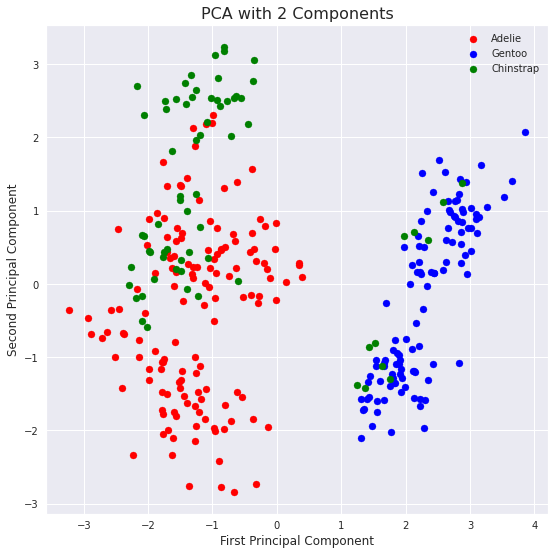

In [373]:
# Visualization of Penguins Data in 2-D after PCA transformation:
fig, ax = plt.subplots(figsize=(9,9)) 
for spe, color in zip(('Adelie', 'Gentoo', 'Chinstrap'), 
                       ('red',   'blue', 'green')): 
    index = df_pca['Species'] == spe 
    ax.scatter(df_pca.loc[index, 'principal component 1'],                                                  
                df_pca.loc[index, 'principal component 2'], 
                c = color)
 
ax.set_xlabel('First Principal Component', fontsize = 12)
ax.set_ylabel('Second Principal Component', fontsize = 12)
ax.set_title('PCA with 2 Components', fontsize = 16)
ax.legend(['Adelie', 'Gentoo', 'Chinstrap'])
ax.grid();

The following diagram is the overall pattern of the entire dataset onto a 2d plane with PCA transformation

From the visualization we can infer that species Gentoo and adelie are very different from each other with Chinstrap would sometimes overlap with both species and it can be seen more often would intercept with Adelie, 
Therefore data science algorithms such as k-means clustering as previously implemented should be able to differentiate the two species of adelie and gentoo with some overlaps with Chinstrap which follows closely what was seen throughout the analysis, which fits from our observation from earlier.


# Conclusion
PCA is a useful method to reduce the dimensionality of dataset for speeding up algorithms,reducing the memory space, and visualizing the overall pattern in your high dimensional data.